# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [5]:
# Load pickled data
import pickle
import csv

# TODO: Fill this in based on where you saved the training and testing data

key_dict = {}
with open('signnames.csv', mode='r') as f:
    reader = csv.reader(f)
    next(reader, None)
    key_dict = {int(x[0]):x[1] for x in reader}

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [6]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = y_train.max()-y_train.min()+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


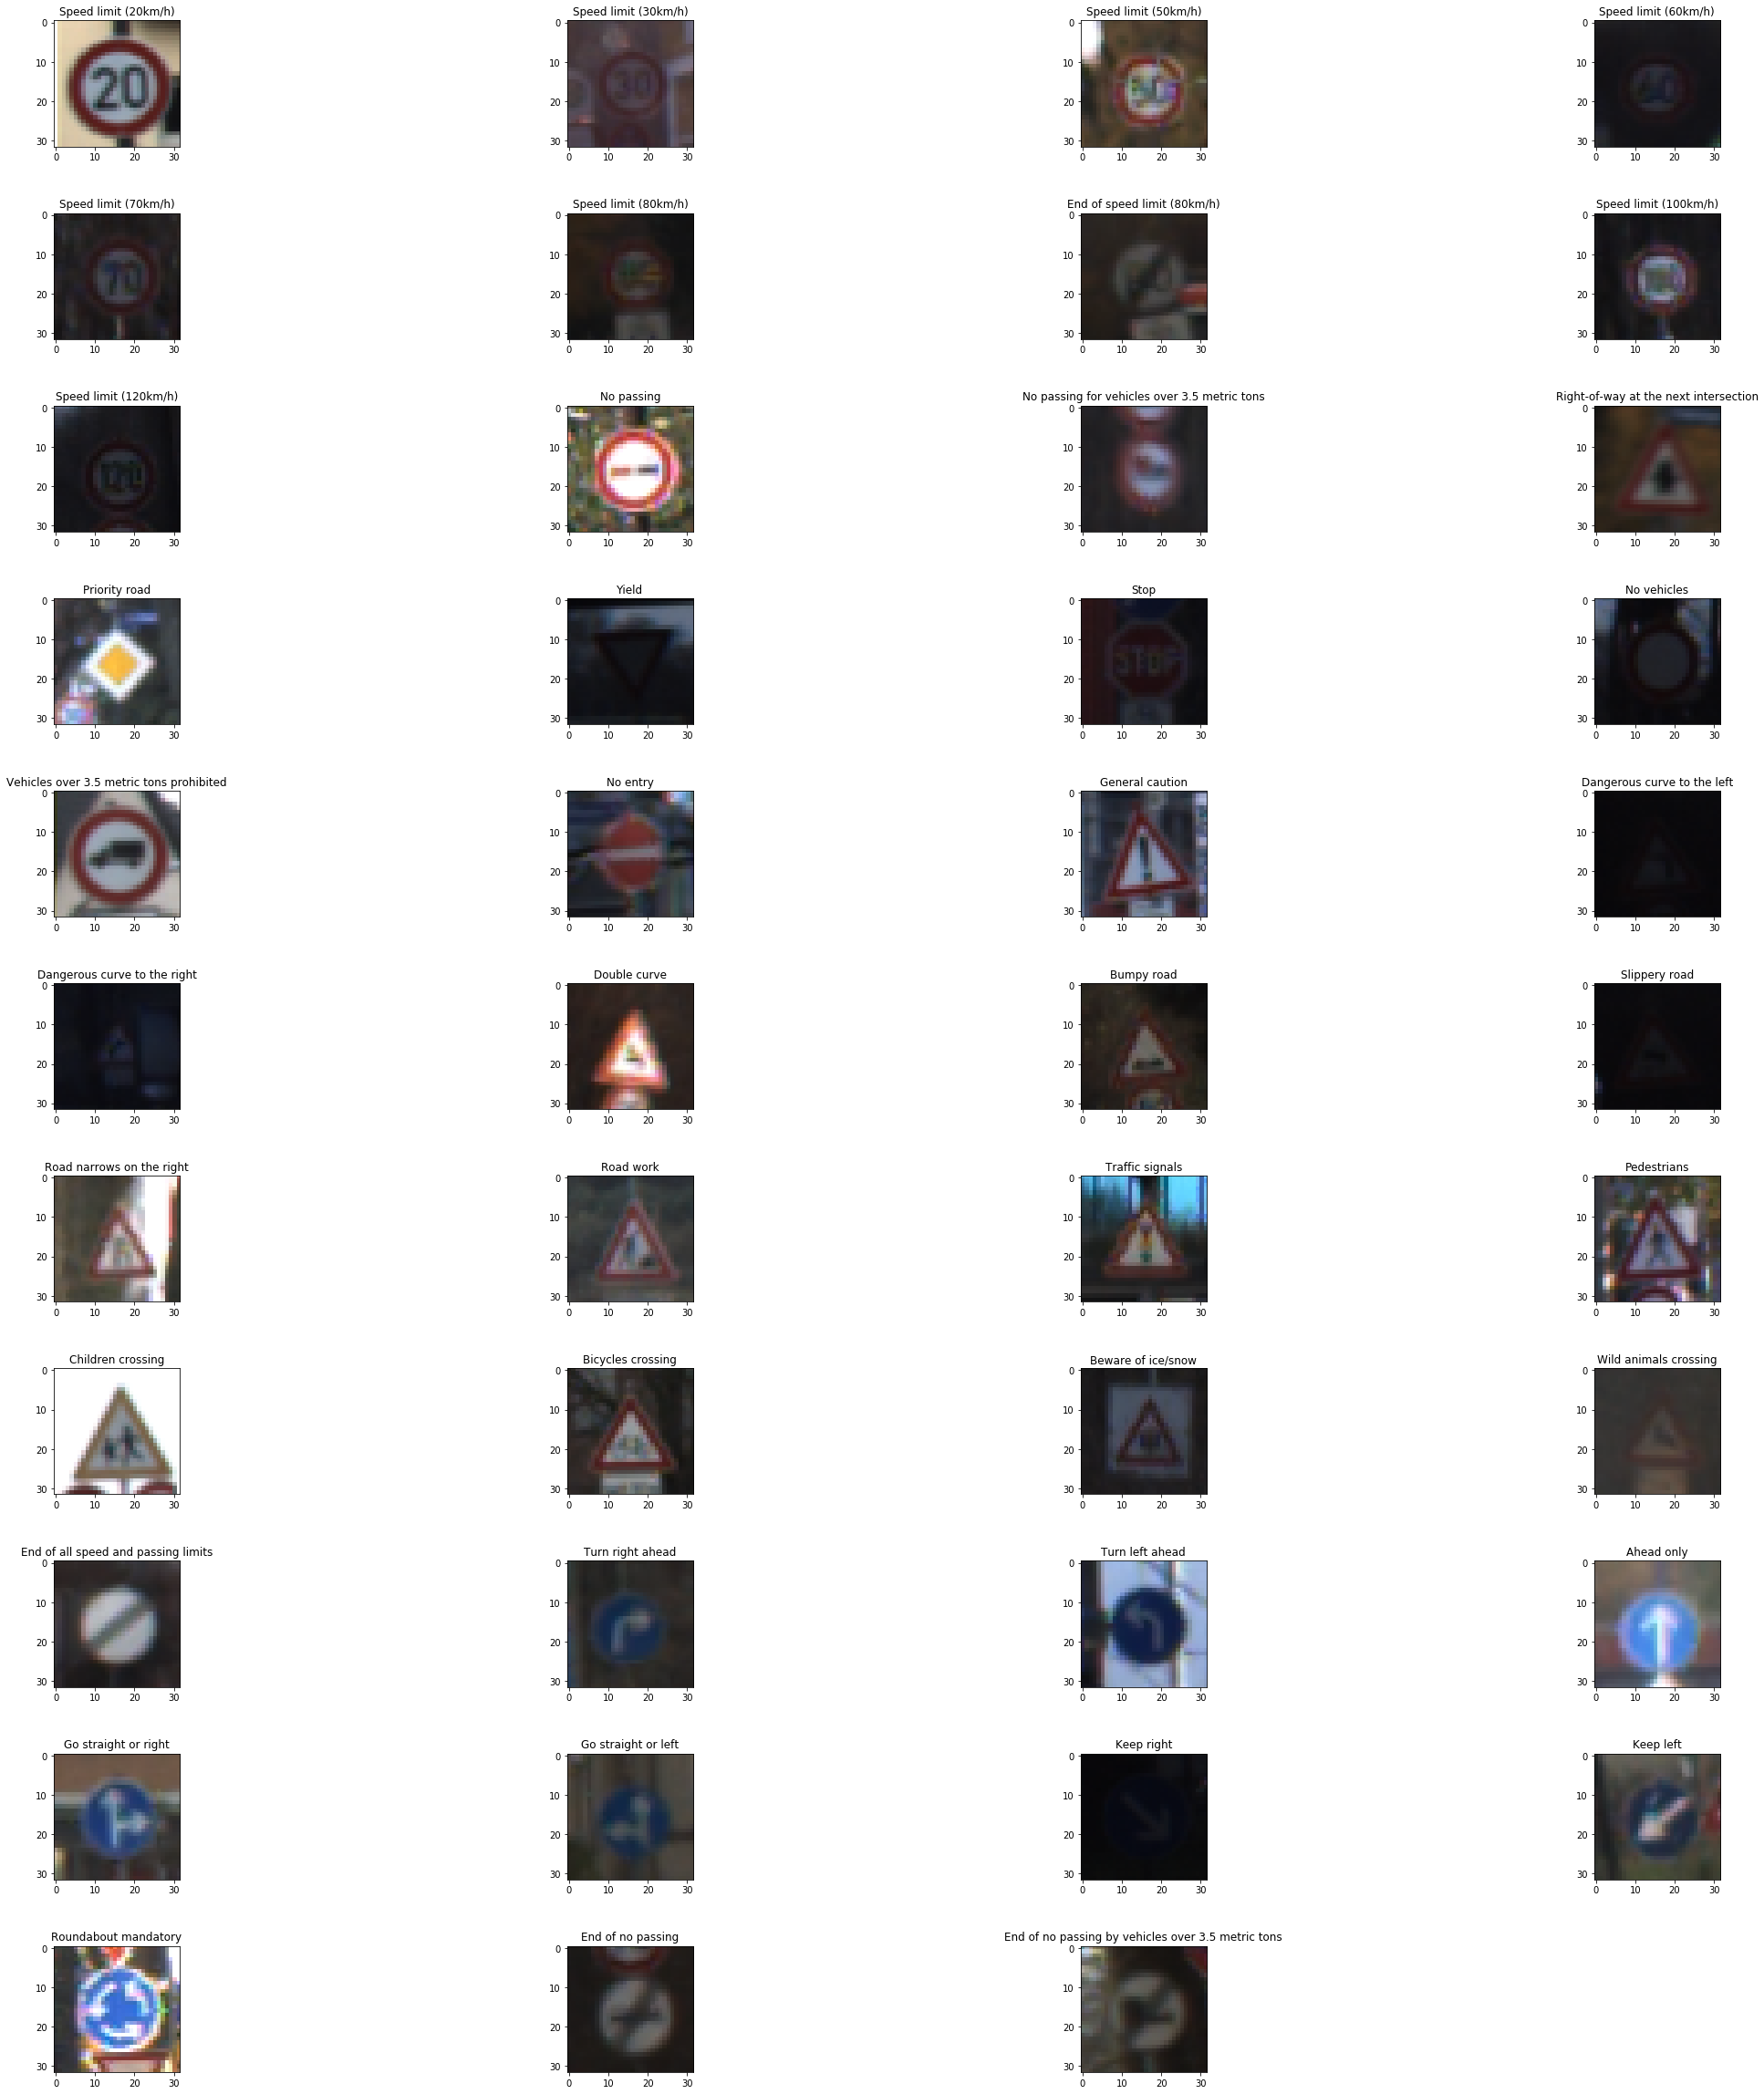

In [7]:
### Data exploration visualization code goes here.

import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

fig = plt.figure(figsize=(32,32), tight_layout={'h_pad':4})
for i in range(n_classes):
    indices = np.where(y_train==i)
    img = X_train[indices[0][0]]
    ax = fig.add_subplot(int(n_classes/4)+1,4,i+1) 
    ax.imshow(img, interpolation='none')
    ax.set_title(key_dict[y_train[indices[0][0]]])
plt.show()

(array([  180.,  1980.,  2010.,  1260.,  1770.,  1650.,   360.,  1290.,
         1260.,  1320.,  1800.,  1170.,  1890.,  1920.,   690.,   540.,
          360.,   990.,  1080.,   180.,   300.,   270.,   330.,   450.,
          240.,  1350.,   540.,   210.,   480.,   240.,   390.,   690.,
          210.,   599.,   360.,  1080.,   330.,   180.,  1860.,   270.,
          300.,   420.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 42 Patch objects>)

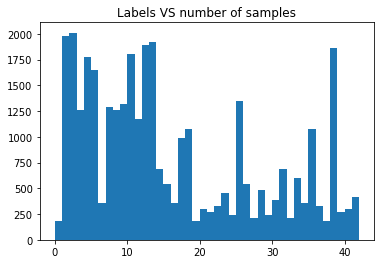

In [8]:
%matplotlib inline

fig = plt.figure()
plt.title('Labels VS number of samples')
classes = range(n_classes)
plt.hist(y_train, classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Q: The submission describes the preprocessing techniques used and why these techniques were chosen.

We will equalise the histogram and then rotate, shear and translate the images so as to augment the data. This gives us more data and also makes our model robust to minor shear rotation and translation.

P.S: Since the dataset was too huge we use joblib to save intermediate checkpoints and files.

In [9]:
### Preprocess the data here

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from tqdm import tqdm
#from sklearn.utils import shuffle
from skimage import exposure

# Equalize the histogram

print('Allocating Memory')
X_train_equalized = np.zeros(X_train.shape)
X_valid_equalized = np.zeros(X_valid.shape)
X_test_equalized = np.zeros(X_test.shape)

print('Equalizing Training Data:')
X_train_equalized = [exposure.equalize_adapthist(i, clip_limit=0.03) for i in tqdm(X_train)]

print('Equalizing Validation Data:')
X_valid_equalized = [exposure.equalize_adapthist(i, clip_limit=0.03) for i in tqdm(X_valid)]

print('Equalizing Testing Data:')
X_test_equalized = [exposure.equalize_adapthist(i, clip_limit=0.03) for i in tqdm(X_test)]


  0%|          | 12/34799 [00:00<05:04, 114.32it/s]

Allocating Memory
Equalizing Training Data:



  0%|          | 12/4410 [00:00<00:38, 115.39it/s]

Equalizing Validation Data:


  0%|          | 11/12630 [00:00<01:58, 106.08it/s]

Equalizing Testing Data:


100%|██████████| 12630/12630 [01:56<00:00, 108.24it/s]


In [ ]:
# Store the variables

import numpy as np

storage_train = {}
storage_train_filename = 'Storage/storage_train'

storage_valid = {}
storage_valid_filename = 'Storage/storage_valid'

storage_test = {}
storage_test_filename = 'Storage/storage_test'

storage_train['X_train_equalized'] = np.array(X_train_equalized)
storage_train['y_train'] = np.array(y_train)
storage_valid['X_valid_equalized'] = np.array(X_valid_equalized)
storage_valid['y_valid'] = np.array(y_valid)
storage_test['X_test_equalized'] = np.array(X_test_equalized)
storage_test['y_test'] = np.array(y_test)

#del y_test, y_valid, y_train
#del X_train_equalized, X_valid_equalized, X_test_equalized, X_train, X_test, X_valid

In [ ]:
# Store the variables for easier access
import joblib
import os

overwrite = False

if not os.path.isfile(storage_train_filename) or overwrite:
    print('Store Training Data Operation has been initiated')
    joblib.dump(storage_train, storage_train_filename)
    print('Store Training Data Operation completed')
else:
    print('Training Data File Exists')
    
if not os.path.isfile(storage_valid_filename) or overwrite:
    print('Store Validation Data Operation has been initiated')
    joblib.dump(storage_valid, storage_valid_filename)
    print('Store Validation Data Operation completed')
else:
    print('Validation Data File Exists')
    
if not os.path.isfile(storage_test_filename) or overwrite:
    print('Store Test Data Operation has been initiated')
    joblib.dump(storage_test, storage_test_filename)
    print('Store Test Data Operation completed')
else:
    print('Testing Data File Exists')

In [ ]:
# Import data from storage

%reset

!pip install joblib

import joblib

storage_train_filename = 'Storage/storage_train'
storage_valid_filename = 'Storage/storage_valid'
storage_test_filename = 'Storage/storage_test'

print('Loading Training Data')
training_data = joblib.load(storage_train_filename)
for key in training_data:
    exec(key + "= training_data['" + str(key) + "']")
del training_data

print('Loading Validation Data')
testing_data = joblib.load(storage_test_filename)
for key in testing_data:
    exec(key + "= testing_data['" + str(key) + "']")
del testing_data

print('Loading Testing Data')
valid_data = joblib.load(storage_valid_filename)
for key in valid_data:
    exec(key + "= valid_data['" + str(key) + "']")
del valid_data

print('Done Loading')

print('Size X and y:', X_train_equalized.shape[0], 'and', X_train_equalized.shape[0])

In [ ]:
import numpy as np
print((X_train_equalized.shape))
print((X_valid_equalized.shape))
print((X_test_equalized.shape))

print((y_train.shape))
print((y_valid.shape))
print((y_test.shape))

# X_train_equalized, X_valid_equalized, X_test_equalized

# y_train, y_valid, y_test

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator

datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=7,
    width_shift_range=0.12,
    height_shift_range=0.12,
    shear_range=0.12,
    zoom_range=0.12,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False
)

In [ ]:
# Augmenting training data

#import os
import numpy as np
from tqdm import tqdm
from sklearn.utils import shuffle
import sys

n_classes = y_train.max()-y_train.min()+1
print('Number of classes =', n_classes)

total_image_per_class = 5000

X_train_augmented1 = np.empty((0,32,32,3))
y_train_augmented1 = np.empty(0,dtype='uint8')

for i in tqdm(range(int(n_classes/2))):
    
    labels_i = y_train[y_train == i]
    im_i = X_train_equalized[y_train == i] #[:][:][:]
    
    X_train_i = np.copy(im_i)
    y_train_i = np.copy(labels_i)
        
    for X,y in datagen.flow(im_i, labels_i, batch_size=len(labels_i)):#, seed=9345+i*37):            
        X_train_i = np.append(X_train_i, X, axis=0)
        y_train_i = np.append(y_train_i, y, axis=0)
            
        if len(X_train_i) >= total_image_per_class:
            break

    X_train_augmented1 = np.append(X_train_augmented1, X_train_i[:total_image_per_class], axis=0)
    y_train_augmented1 = np.append(y_train_augmented1, y_train_i[:total_image_per_class], axis=0)
    
X_train_augmented2 = np.empty((0,32,32,3))
y_train_augmented2 = np.empty(0,dtype='uint8')

for i in tqdm(range(int(n_classes/2 + 1))):
    
    k = i + int(n_classes/2)
    labels_i = y_train[y_train == k]
    im_i = X_train_equalized[y_train == k] #[:][:][:]
    
    X_train_i = np.copy(im_i)
    y_train_i = np.copy(labels_i)
        
    for X,y in datagen.flow(im_i, labels_i, batch_size=len(labels_i)):#, seed=9345+i*37):            
        X_train_i = np.append(X_train_i, X, axis=0)
        y_train_i = np.append(y_train_i, y, axis=0)
            
        if len(X_train_i) >= total_image_per_class:
            break

    X_train_augmented2 = np.append(X_train_augmented2, X_train_i[:total_image_per_class], axis=0)
    y_train_augmented2 = np.append(y_train_augmented2, y_train_i[:total_image_per_class], axis=0)
    
# Checkpoint 1

print('Size X1 and y1:', X_train_augmented1.shape[0], 'and', y_train_augmented1.shape[0])
print('Size X2 and y2:', X_train_augmented2.shape[0], 'and', y_train_augmented2.shape[0])

storage = {}
storage['X_train_augmented1'] = X_train_augmented1
del X_train_augmented1
storage['y_train_augmented1'] = y_train_augmented1
del y_train_augmented1
storage['X_train_augmented2'] = X_train_augmented2
del X_train_augmented2
storage['y_train_augmented2'] = y_train_augmented2
del y_train_augmented2

In [ ]:
import os
import joblib

overwrite = False

storage_train_filename = 'Storage/checkpoint1'

if not os.path.isfile(storage_train_filename) or overwrite:
    print('Store Training Data Operation has been initiated')
    joblib.dump(storage, storage_train_filename)
    print('Store Training Data Operation completed')
else:
    print('Training Data File Exists')

In [ ]:
%reset

import numpy as np
from tqdm import tqdm
from sklearn.utils import shuffle
import sys
import joblib
import os

storage_train_filename = 'Storage/checkpoint1'

print('Loading Training Data')
training_data = joblib.load(storage_train_filename)
for key in training_data:
    exec(key + "= training_data['" + str(key) + "']")
del training_data
print('Loaded')

print('Size X1 and y1:', X_train_augmented1.shape[0], 'and', y_train_augmented1.shape[0])
print('Size X2 and y2:', X_train_augmented2.shape[0], 'and', y_train_augmented2.shape[0])

print('Appending the arrays')
X_train_augmented1 = np.append(X_train_augmented1, X_train_augmented2, axis = 0)
del X_train_augmented2
y_train_augmented1 = np.append(y_train_augmented1, y_train_augmented2, axis = 0)
del y_train_augmented2
print('Done')

print('Size X and y:', X_train_augmented1.shape[0], 'and', y_train_augmented1.shape[0])

# Checkpoint 2
storage = {}
storage['X_train_augmented'] = X_train_augmented1
del X_train_augmented1
storage['y_train_augmented'] = y_train_augmented1
del y_train_augmented1

overwrite = False

storage_train_filename = 'Storage/checkpoint2'

if not os.path.isfile(storage_train_filename) or overwrite:
    print('Store Training Data Operation has been initiated')
    joblib.dump(storage, storage_train_filename)
    print('Store Training Data Operation completed')
else:
    print('Training Data File Exists')

In [ ]:
%reset

import numpy as np
from tqdm import tqdm
from sklearn.utils import shuffle
import sys
import joblib
import os

storage_train_filename = 'Storage/checkpoint2'

print('Loading Training Data')
training_data = joblib.load(storage_train_filename)
for key in training_data:
    exec(key + "= training_data['" + str(key) + "']")
del training_data
print('Loaded')

print('Size X and y:', X_train_augmented.shape[0], 'and', y_train_augmented.shape[0])

print('Shuffling the arrays')
X_train_augmented, y_train_augmented = shuffle(X_train_augmented, y_train_augmented)
print('Done shuffling')
    
X_train_augmented = X_train_augmented.astype('float32')

# Checkpoint 3

storage = {}
storage['X_train_augmented'] = X_train_augmented
del X_train_augmented
storage['y_train_augmented'] = y_train_augmented
del y_train_augmented

overwrite = False

storage_train_filename = 'Storage/checkpoint3'

if not os.path.isfile(storage_train_filename) or overwrite:
    print('Store Training Data Operation has been initiated')
    joblib.dump(storage, storage_train_filename)
    print('Store Training Data Operation completed')
else:
    print('Training Data File Exists')

#storage.keys()

### Import important data

In [1]:
%reset

!pip install joblib

import numpy as np
from tqdm import tqdm
from sklearn.utils import shuffle
import sys
import joblib
import os

storage_train_filename = 'Storage/checkpoint2'

print('Loading Training Data')
training_data = joblib.load(storage_train_filename)
for key in training_data:
    exec(key + "= training_data['" + str(key) + "']")
del training_data

storage_valid_filename = 'Storage/storage_valid'
storage_test_filename = 'Storage/storage_test'

print('Loading Validation Data')
valid_data = joblib.load(storage_valid_filename)
for key in valid_data:
    exec(key + "= valid_data['" + str(key) + "']")
del valid_data

n_classes = y_train_augmented.max()-y_train_augmented.min()+1

print('Done Loading')

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Loading Training Data
Loading Validation Data
Done Loading


### Model Architecture

The submission provides details of the characteristics and qualities of the architecture, such as the type of model used, the number of layers, the size of each layer. Visualizations emphasizing particular qualities of the architecture are encouraged.

I've used a modified LeNet architecture which uses the following layers
* Convolution layer followed by a pooling layer then a dropout layer (IN = 32x32x3, OUT = 14x14x6)
* Convolution layer followed by a pooling layer then a dropout layer (IN = 14x14x6, OUT = 5x5x6)
* Fully connected layer with relu activation and dropout layer (IN = 5x5x16, OUT = 120)
* Fully connected layer with relu activation and dropout layer (IN = 120, OUT = 84)
* Fully connected layer with output = 43

In [2]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def conv2d(x, W, b, strides, padding):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k, padding):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding=padding)


def LeNet(x):
    
    # Input = 32x32x3
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #x_gray = tf.image.rgb_to_grayscale(x)
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6
    # Pooling Output = 14x14x6
    W1 = tf.Variable(tf.truncated_normal([5, 5, 3, 6], mean = mu, stddev = sigma), name='W1')
    b1 = tf.Variable(tf.zeros(6), name='b1')
    layer1 = conv2d(x, W1, b1, 1, 'VALID')
    pool1 = tf.nn.dropout(maxpool2d(layer1, 2, 'VALID'), keep_prob_for_conv)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    # Pooling. Output = 5x5x16
    W2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean = mu, stddev = sigma), name='W2')
    b2 = tf.Variable(tf.zeros(16), name='b2')
    layer2 = conv2d(pool1, W2, b2, 1, 'VALID')
    pool2 = tf.nn.dropout(maxpool2d(layer2, 2, 'VALID'), keep_prob_for_conv)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc = flatten(pool2)
    W_fc1 = tf.Variable(tf.truncated_normal([400, 120], mean = mu, stddev = sigma), name='W_fc1')
    b_fc1 = tf.Variable(tf.zeros(120), name='b_fc1')
    fc1 = tf.nn.relu(tf.add(tf.matmul(fc, W_fc1), b_fc1))
    fc1_drop = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    W_fc2 = tf.Variable(tf.truncated_normal([120, 84], mean = mu, stddev = sigma), name='W_fc2')
    b_fc2 = tf.Variable(tf.zeros(84), name='b_fc2')
    fc2 = tf.nn.relu(tf.add(tf.matmul(fc1_drop, W_fc2), b_fc2))
    fc2_drop = tf.nn.dropout(fc2, keep_prob)
    

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    W_fc3 = tf.Variable(tf.truncated_normal([84, 43], mean = mu, stddev = sigma), name='W_fc3')
    b_fc3 = tf.Variable(tf.zeros(43), name='b_fc3')
    logits = tf.add(tf.matmul(fc2_drop, W_fc3), b_fc3)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [3]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

from tqdm import tqdm
from sklearn.utils import shuffle
import tensorflow as tf
import random
import numpy as np

EPOCHS = 15
BATCH_SIZE = 128
validation_accuracy = 0.0

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob_for_conv = tf.placeholder(tf.float32)
keep_prob = tf.placeholder(tf.float32)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1, keep_prob_for_conv:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    num_examples = len(X_train_augmented)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        per = np.random.permutation(X_train_augmented.shape[0])
#         X_train = X_train_augmented[per]
#         y_train = y_train_augmented[per]
#         #X_train, y_train = shuffle(X_train_augmented, y_train_augmented)
        for offset in tqdm(range(0, num_examples, BATCH_SIZE)):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_augmented[per[offset:end]], y_train_augmented[per[offset:end]]                    
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1, keep_prob_for_conv:1})
            
        validation_accuracy = evaluate(X_valid_equalized, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        if ((i+1) % 5 == 0):
            saver.save(sess, 'lenet')
            print("Model saved")
        
    saver.save(sess, 'lenet')
    print("Model saved")


  0%|          | 1/1680 [00:00<04:40,  5.99it/s]

Training...



  0%|          | 1/1680 [00:00<04:38,  6.03it/s]

EPOCH 1 ...
Validation Accuracy = 0.872



  0%|          | 1/1680 [00:00<04:33,  6.13it/s]

EPOCH 2 ...
Validation Accuracy = 0.910



  0%|          | 1/1680 [00:00<04:44,  5.90it/s]

EPOCH 3 ...
Validation Accuracy = 0.927



  0%|          | 1/1680 [00:00<05:11,  5.40it/s]

EPOCH 4 ...
Validation Accuracy = 0.928



100%|██████████| 1680/1680 [04:31<00:00,  7.07it/s]


EPOCH 5 ...
Validation Accuracy = 0.941



  0%|          | 1/1680 [00:00<04:36,  6.07it/s]

Model saved


  0%|          | 1/1680 [00:00<04:22,  6.39it/s]

EPOCH 6 ...
Validation Accuracy = 0.933



  0%|          | 1/1680 [00:00<04:26,  6.29it/s]

EPOCH 7 ...
Validation Accuracy = 0.944



  0%|          | 1/1680 [00:00<04:26,  6.31it/s]

EPOCH 8 ...
Validation Accuracy = 0.939



  0%|          | 1/1680 [00:00<04:34,  6.12it/s]

EPOCH 9 ...
Validation Accuracy = 0.951



100%|██████████| 1680/1680 [04:26<00:00,  6.95it/s]


EPOCH 10 ...
Validation Accuracy = 0.954



  0%|          | 1/1680 [00:00<04:36,  6.06it/s]

Model saved


  0%|          | 1/1680 [00:00<04:27,  6.28it/s]

EPOCH 11 ...
Validation Accuracy = 0.953



  4%|▍         | 70/1680 [00:11<04:20,  6.18it/s]

KeyboardInterrupt: 

### Q: The submission describes the approach to finding a solution. Accuracy on the validation set is 0.93 or greater.

As we can observe above, the final validation accuracy after 11 Epochs was 0.953. Many hyperparameters were tried and the ones above are the final ones that I've settled on which give the highest accurary. Also, due to the lack of a GPU, the training time was a lot and I terminated the training after 11 epochs instead of 15.

### Test Set Accuracy

In [4]:
from tqdm import tqdm
from sklearn.utils import shuffle
import tensorflow as tf
import random
import numpy as np
import sys
import joblib
import os


storage_test_filename = 'Storage/storage_test'

print('Loading Testing Data')
testing_data = joblib.load(storage_test_filename)
for key in testing_data:
    exec(key + "= testing_data['" + str(key) + "']")
del testing_data

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    new_saver = tf.train.import_meta_graph('lenet.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    
    accuracy = evaluate(X_test_equalized, y_test)
    print("Test Accuracy = {:.3f}".format(accuracy))

Loading Testing Data
Test Accuracy = 0.941


### Q: The submission describes how the model was trained by discussing what optimizer was used, batch size, number of epochs and values for hyperparameters?

The model has been trained with adam optimizer and the batch size was set to 128 since I was using a CPU to train it. I ran it for 11 epochs after which I terminated it (Thats why there appears to be an error in the IN[3] Cell). I chose the values of sigma and mu to be 0.1 and 0 respectively as I choose previously.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

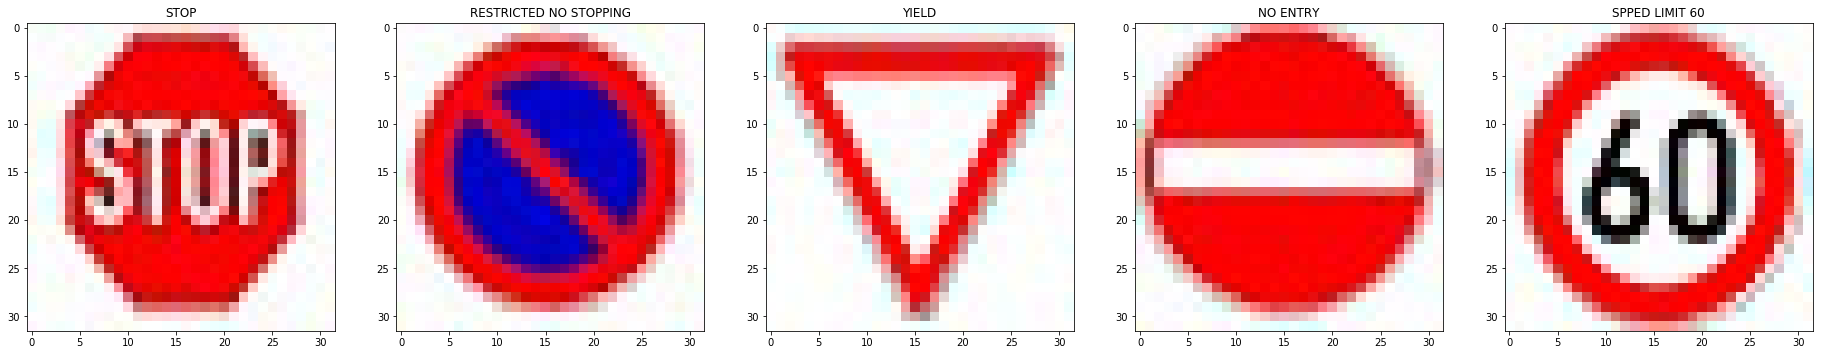

In [36]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

names_list = glob.glob('./new_data/*.jpg')

img_list = []
for name in names_list:
    i = mpimg.imread(name)
    img_list.append(i)

fig = plt.figure(figsize=(32,32))
ax = fig.add_subplot(1,5,1)
ax.imshow(img_list[0])
ax.set_title('STOP')

ax = fig.add_subplot(1,5,2)
ax.imshow(img_list[1])
ax.set_title('RESTRICTED NO STOPPING')

ax = fig.add_subplot(1,5,3)
ax.imshow(img_list[2])
ax.set_title('YIELD')

ax = fig.add_subplot(1,5,4)
ax.imshow(img_list[3])
ax.set_title('NO ENTRY')

ax = fig.add_subplot(1,5,5)
ax.imshow(img_list[4])
ax.set_title('SPPED LIMIT 60')


### Predict the Sign Type for Each Image

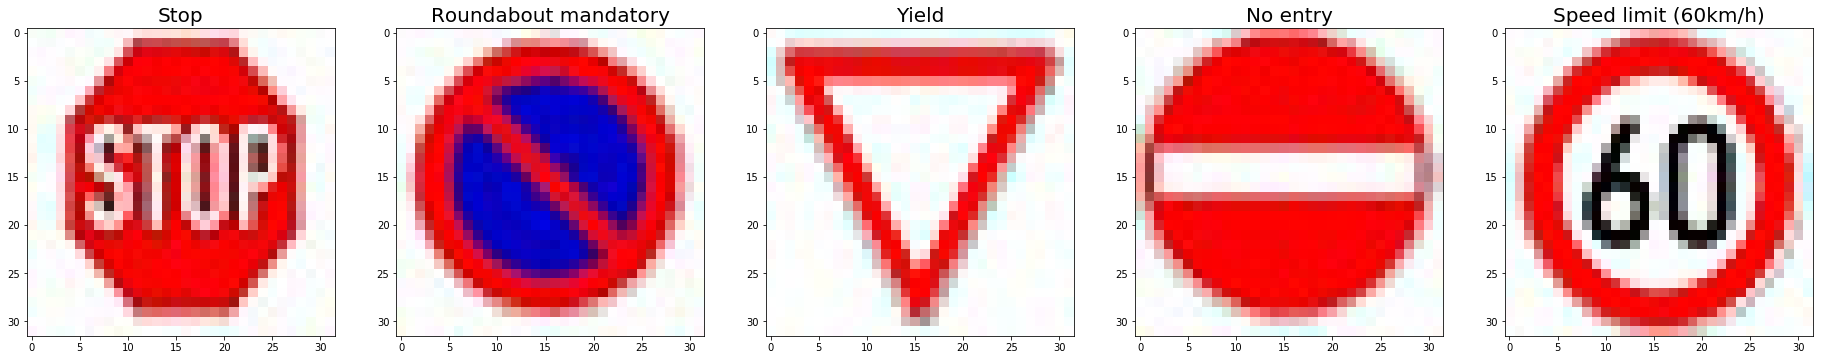

In [39]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.


import numpy as np
from PIL import Image
from skimage import exposure
import os
import sys
import csv

key_dict = {}
with open('signnames.csv', mode='r') as f:
    reader = csv.reader(f)
    next(reader, None)
    key_dict = {int(x[0]):x[1] for x in reader}

def image_equalizer(image_data):
    return np.array([exposure.equalize_adapthist(image, clip_limit=0.03) for image in image_data])

size = 32, 32
logit = None

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    sess = tf.get_default_session()
    
    
    fig = plt.figure(figsize=(32,32))
    i = 0
    for file in os.listdir('new_data'):
        if '.jpg' in file:
            image = Image.open('new_data/' + file)
            im_equalized = image_equalizer(np.array([np.array(image)]))
            logit = sess.run(tf.argmax(logits, 1), feed_dict={x:im_equalized, keep_prob:1.0, keep_prob_for_conv:1})
            ax = fig.add_subplot(1,5,i+1) 
            img = mpimg.imread('new_data/' + file)
            ax.imshow(img)
            ax.set_title(key_dict[logit[0]], fontsize=20)
            i+=1
    plt.show()

### Analyze Performance

### Accuracy Calculations

accuracy = 4/5 = 80%

As we suspected, since the don't stop sign wasn't in the dataset, it misclassified it as roundabout mandatory.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

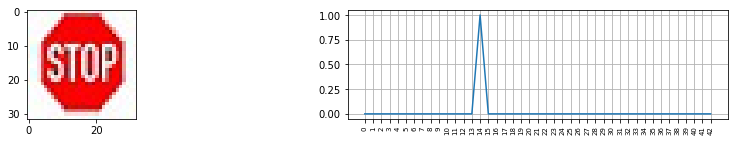

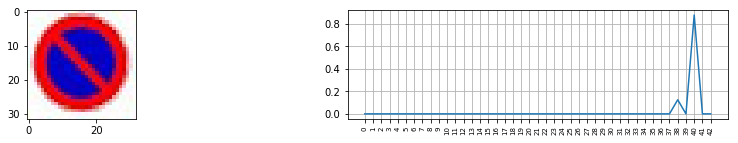

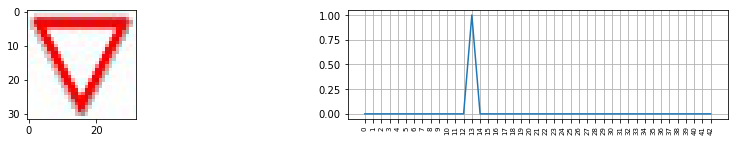

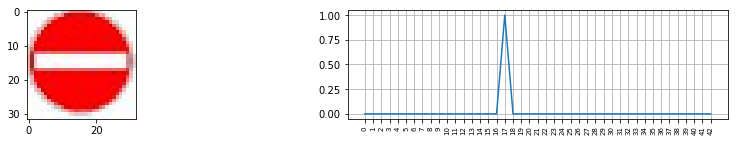

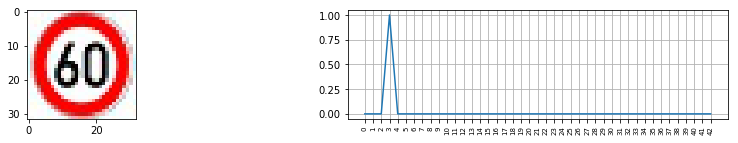

In [41]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

import os
import sys
import numpy as np
from PIL import Image
from skimage import exposure
import pandas as pd

def image_equalizer(image_data):
    return np.array([exposure.equalize_adapthist(image, clip_limit=0.03) for image in image_data])

size = 32, 32
softmax_p = None

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    sess = tf.get_default_session()
    
    i = 0
    for file in os.listdir('new_data'):
        if '.jpg' in file:
            image = Image.open('new_data/' + file)
            im_equalized = image_equalizer(np.array([np.array(image)]))
            softmax_p = sess.run(tf.nn.softmax(logits), feed_dict={x:im_equalized, keep_prob:1.0, keep_prob_for_conv:1})
            fig = plt.figure(figsize=(15,2))
            ax = fig.add_subplot(1,2,1) 
            img = mpimg.imread('new_data/' + file)
            ax.imshow(img)
            
            ax = fig.add_subplot(1,2,2) 
            ax.set_xticks(np.arange(0,43,1))
            plt.plot(softmax_p[0])
            for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize('x-small') 
                tick.label.set_rotation('vertical')
            plt.grid()
            plt.show()

### Conclusions
As we could clearly observe from the above figure. The softmax probabilities of all the traffic signs were classified correctly while for the don't stop sign the network was slightly confused between label 38 and label 40 and finally selected 40 which is roundabout mandatory.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 